In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import load_iris
dataset = load_iris()
x = dataset.data
t = dataset.target
feature_names = dataset.feature_names

In [3]:
pd.DataFrame(x, columns = feature_names).head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [4]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2, random_state = 0)

In [5]:
pca.fit(x)

PCA(n_components=2, random_state=0)

In [6]:
pca.get_covariance()

array([[ 0.67918961, -0.03571514,  1.2714061 ,  0.53137208],
       [-0.03571514,  0.18303922, -0.32672469, -0.13706322],
       [ 1.2714061 , -0.32672469,  3.12237957,  1.28464626],
       [ 0.53137208, -0.13706322,  1.28464626,  0.58834865]])

In [7]:
x_transformed = pca.transform(x)

In [8]:
pd.DataFrame(x_transformed, columns = ['第一主成分', '第二主成分']).head()

,第一主成分,第二主成分
0,-2.684126,0.319397
1,-2.714142,-0.177001
2,-2.888991,-0.144949
3,-2.745343,-0.318299
4,-2.728717,0.326755


In [9]:
print('第一主成分の寄与率:{}'.format(pca.explained_variance_ratio_[0]))
print('第二主成分の寄与率:{}'.format(pca.explained_variance_ratio_[1]))

第一主成分の寄与率:0.9246187232017271
第二主成分の寄与率:0.05306648311706782


In [10]:
np.unique(t)

array([0, 1, 2])

/usr/local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

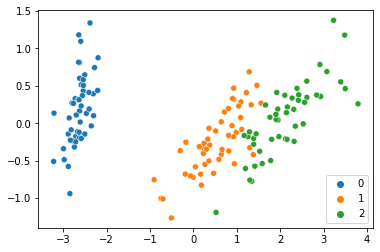

In [11]:
sns.scatterplot(x_transformed[:, 0], x_transformed[:, 1], hue = t, palette = sns.color_palette(n_colors = 3))

In [12]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [13]:
pca = PCA(n_components = 2, random_state = 0)

In [14]:
x_std_transformed = pca.fit_transform(x_scaled)

In [15]:
pd.DataFrame(x_std_transformed, columns = ['第一主成分', '第二主成分']).head(10)

,第一主成分,第二主成分
0,-2.264703,0.480027
1,-2.080961,-0.674134
2,-2.364229,-0.341908
3,-2.299384,-0.597395
4,-2.389842,0.646835
5,-2.075631,1.489178
6,-2.444029,0.047644
7,-2.232847,0.223148
8,-2.334640,-1.115328
9,-2.184328,-0.469014


In [16]:
print('第一主成分の寄与率:{}'.format(pca.explained_variance_ratio_[0]))
print('第二主成分の寄与率:{}'.format(pca.explained_variance_ratio_[1]))

第一主成分の寄与率:0.7296244541329987
第二主成分の寄与率:0.2285076178670178


/usr/local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

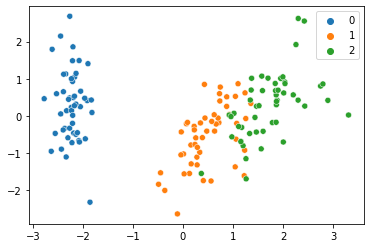

In [17]:
sns.scatterplot(x_std_transformed[:, 0], x_std_transformed[:, 1], hue = t, palette = sns.color_palette(n_colors = 3))

/usr/local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'After')

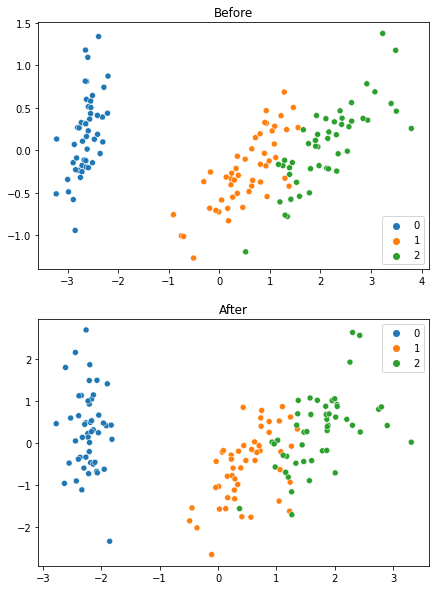

In [18]:
fig = plt.figure(figsize = (7, 10))

ax1 = fig.add_subplot(2, 1, 1)
sns.scatterplot(x_transformed[:, 0], x_transformed[:, 1],
               hue = t, palette = sns.color_palette(n_colors = 3))
ax1.set_title('Before')

ax2 = fig.add_subplot(2, 1, 2)
sns.scatterplot(x_std_transformed[:, 0], x_std_transformed[:, 1],
               hue = t, palette = sns.color_palette(n_colors = 3))
ax2.set_title('After')

In [19]:
df = pd.read_csv('./convinience_store.csv')
df.head()

,No,弁当・麺類,飲料,おにぎり・サンドイッチ,スイーツ,カップスープ,サラダ
0,1,25350,3650,8945,0,4867,8945
1,2,24500,0,0,1827,0,0
2,3,23050,5750,11570,0,7667,11570
3,4,22850,4100,10145,0,5467,10145
4,5,22500,0,0,0,0,0


In [20]:
x = df.drop('No', axis = 1).values
x[:3]

array([[25350,  3650,  8945,     0,  4867,  8945],
       [24500,     0,     0,  1827,     0,     0],
       [23050,  5750, 11570,     0,  7667, 11570]])

In [21]:
from sklearn.cluster import KMeans

In [22]:
kmeans = KMeans(n_clusters = 3, random_state = 0)
kmeans.fit(x)

KMeans(n_clusters=3, random_state=0)

In [25]:
kmeans.cluster_centers_

array([[ 5043.5483871 ,  3486.41935484,  7017.74193548,  2206.        ,
         2512.90322581,  3509.12903226],
       [28681.25      ,  5637.66666667,  1298.75      ,  1271.        ,
         1770.875     ,   716.95833333],
       [17266.66666667,  2730.93333333, 10721.66666667,   590.86666667,
         3447.33333333,  9851.2       ]])

In [26]:
kmeans.cluster_centers_.shape

(3, 6)

In [27]:
cluster = kmeans.predict(x)
cluster

array([2, 1, 2, 2, 1, 2, 1, 1, 1, 2, 1, 2, 2, 1, 2, 2, 2, 2, 0, 2, 2, 0,
       2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1], dtype=int32)

In [28]:
df_cluster = df.copy()
df_cluster['cluster'] = cluster

In [29]:
df_cluster.head()

,No,弁当・麺類,飲料,おにぎり・サンドイッチ,スイーツ,カップスープ,サラダ,cluster
0,1,25350,3650,8945,0,4867,8945,2
1,2,24500,0,0,1827,0,0,1
2,3,23050,5750,11570,0,7667,11570,2
3,4,22850,4100,10145,0,5467,10145,2
4,5,22500,0,0,0,0,0,1


In [30]:
df_results = pd.DataFrame()
df_results

""


In [31]:
df_cluster[df_cluster['cluster'] == 0].mean().tolist()

[37.806451612903224,
 5043.548387096775,
 3486.4193548387098,
 7017.741935483871,
 2206.0,
 2512.9032258064517,
 3509.1290322580644,
 0.0]

In [33]:
df_results['cluster 0'] = df_cluster[df_cluster['cluster'] == 0].mean().tolist()
df_results['cluster 1'] = df_cluster[df_cluster['cluster'] == 1].mean().tolist()
df_results['cluster 2'] = df_cluster[df_cluster['cluster'] == 2].mean().tolist()

In [34]:
df_results

,cluster 0,cluster 1,cluster 2
0,37.806452,46.250000,13.533333
1,5043.548387,28681.250000,17266.666667
2,3486.419355,5637.666667,2730.933333
3,7017.741935,1298.750000,10721.666667
4,2206.000000,1271.000000,590.866667
5,2512.903226,1770.875000,3447.333333
6,3509.129032,716.958333,9851.200000
7,0.000000,1.000000,2.000000


In [37]:
df_results = df_results.set_index(df_cluster.columns)
df_results = df_results.drop(['No', 'cluster']).T

In [38]:
df_results

,弁当・麺類,飲料,おにぎり・サンドイッチ,スイーツ,カップスープ,サラダ
cluster 0,5043.548387,3486.419355,7017.741935,2206.000000,2512.903226,3509.129032
cluster 1,28681.250000,5637.666667,1298.750000,1271.000000,1770.875000,716.958333
cluster 2,17266.666667,2730.933333,10721.666667,590.866667,3447.333333,9851.200000
